# # Code for Question 1

In [24]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("data.csv")

In [25]:
high_rainfall = np.percentile(data["rainfall"], 95, interpolation = 'midpoint')

In [26]:
high_humidity = np.percentile(data["humidity"], 95, interpolation = 'midpoint')

In [27]:
high_nitrogen = np.percentile(data["N"], 95, interpolation = 'midpoint')

In [28]:
data['crop_rainfall_high'] = np.where(data['rainfall']>high_rainfall , 1, 0)

In [29]:
data['crop_humidity_high'] = np.where(data['humidity']>high_humidity , 1, 0)

In [30]:
data['crop_nitrogen_high'] = np.where(data['N']>high_nitrogen , 1, 0)

In [31]:
data_output=data.groupby(['label']).agg({'crop_rainfall_high':'sum','crop_humidity_high':'sum','crop_nitrogen_high':'sum'})

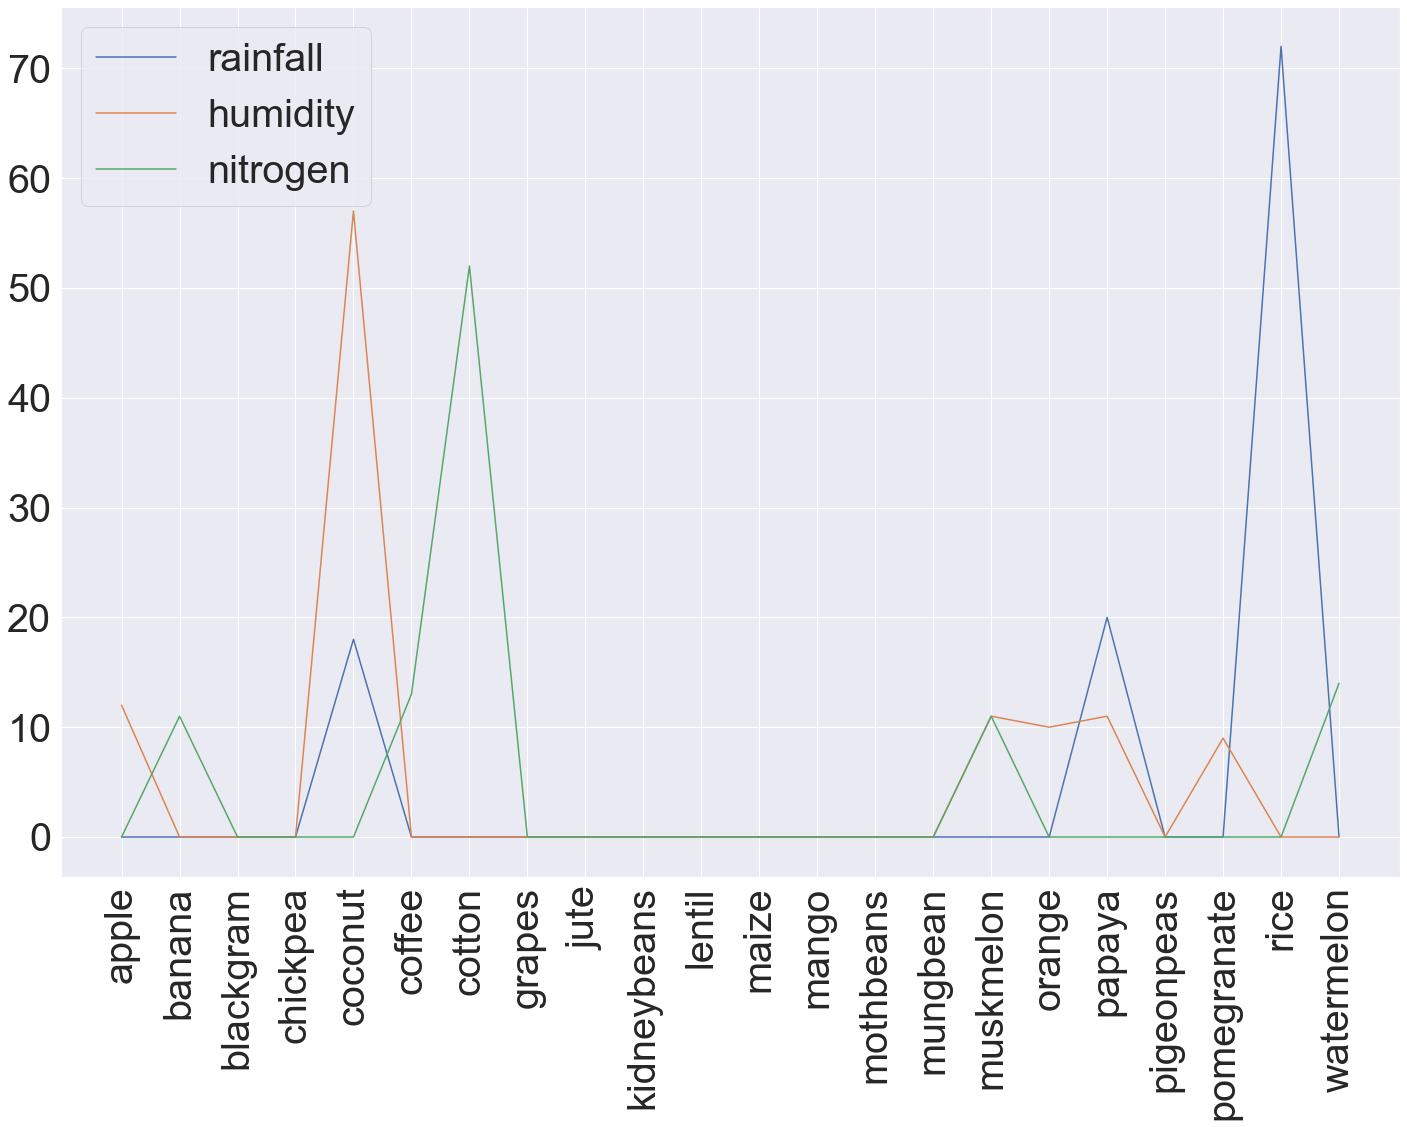

In [32]:
import seaborn as sns

data_output.to_csv('data_output.csv')
data_output_csv=pd.read_csv("data_output.csv", skiprows=0)
sns.set(font_scale=3.6)
plt.figure(figsize=(24, 16))
plt.plot(data_output_csv['label'], data_output['crop_rainfall_high'], label = "rainfall")
plt.plot(data_output_csv['label'], data_output['crop_humidity_high'], label = "humidity")
plt.plot(data_output_csv['label'], data_output['crop_nitrogen_high'], label = "nitrogen")
plt.legend()
plt.xticks(rotation=90)
plt.show()
# plt.savefig('crop_high.png')




# Code for Question 2



In [33]:
data=pd.read_csv("data.csv")
data.isnull().sum().sum()
data1= data[['N','P','K','temperature','humidity','ph','rainfall']]

In [34]:
data.select_dtypes('object').head(5)

,label
0,rice
1,rice
2,rice
3,rice
4,rice


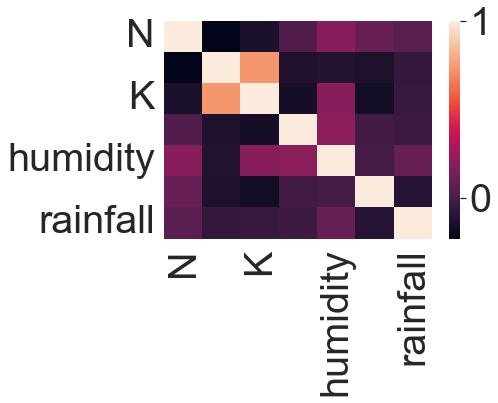

In [35]:
sns.heatmap(data.corr())
plt.show()

In [36]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data1.loc[:,].values

# let's check the shape of x
print(x.shape)

(2200, 7)


In [37]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()

,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


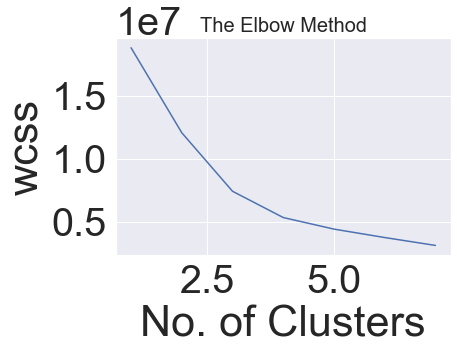

In [38]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 9, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [39]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis")
print("\n---------------------------------------------------------------\n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("\n---------------------------------------------------------------\n")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("\n---------------------------------------------------------------\n")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("\n---------------------------------------------------------------\n")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())
print("\n---------------------------------------------------------------")

Lets check the Results After Applying the K Means Clustering Analysis

---------------------------------------------------------------

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']

---------------------------------------------------------------

Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']

---------------------------------------------------------------

Crops in Third Cluster: ['grapes' 'apple']

---------------------------------------------------------------

Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']

---------------------------------------------------------------


# Code for question 3

In [40]:
data=pd.read_csv("data.csv")

In [41]:

# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


In [42]:
y = data['label']
x=data.drop(['label'], axis = 1)


#lets check the shape of the dataset 
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (2200, 7)
Shape of y:  (2200,)


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("Shape of xtrain:", x_train.shape)
print("Shape of xtest:", x_test.shape)
print("Shape of ytrain:", y_train.shape)
print("Shape of ytest:", y_test.shape)


Shape of xtrain: (1760, 7)
Shape of xtest: (440, 7)
Shape of ytrain: (1760,)
Shape of ytest: (440,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.82      0.86      0.84        21
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.89      0.94        18
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.84      0.91        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.89      0.94      0.91        17
       mango       1.00      1.00      1.00        21
   mothbeans       0.92      0.88      0.90        26
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

In [45]:
ar= [20, 30, 10, 15, 90, 7.5, 100]

In [23]:
prediction = model.predict(np.array([[20, 30, 10, 15, 90, 7.5, 100]]))
prediction

array(['orange'], dtype=object)